In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import abtem
import os
import dask
import os 
import sys
import importlib

#paths [part I]
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
data_folder = os.path.abspath(os.path.join(parent_dir, 'data', ))
results_folder = os.path.abspath(os.path.join(parent_dir, 'results'))

#import homemade modules by adding hBN_sim directory to sys.path
sys.path.insert(0, parent_dir)

import helper_funcs
from helper_funcs import create_parameter_list

#setting configuration
abtem.config.set({"device": "gpu", "fft": "fftw"})
dask.config.set({"num_workers": 1})

### Data

In [2]:
#paths [part II]
#CHOOSE - which data will be displayed

#data_dir = f'{data_folder}/data_C_chain/'
#data_dir = f'{data_folder}/data_aberrations/'
data_dir = f'{data_folder}/raw_no_aberrations_numconfig20/'
#data_dir = f'{data_folder}'
#data_dir = f'{data_folder}/data_old/data_numconfigs10/'

#CHOOSE - directory for resulting images
#results_dir = f'{results_folder}/images_aberrations'
#results_dir = f'{results_folder}/images_C_chain'
#results_dir = f'{results_folder}/images_DFT'
results_dir = f'{results_folder}/images_no_aberrations_numconfig20'

### Optional

In [3]:
#reload when updating helper_funcs while working
importlib.reload(helper_funcs)
from helper_funcs import create_parameter_list

In [4]:
#view and manipulate overview 
#df = pd.read_csv('./data/data_overview.csv', index_col = 'timestamp')

#insert timestamps of file entries that will be deleted
#time_to_loose = [20240903180503, 20240912233158, 20240913013028, 20240913032900, 20240913184928, 20240913204757, 
#                 20240914004459, 20240913120143, 20240913163156, 20240914045444]
#df1 = df.drop(time_to_loose)

#df1.to_csv('./data/data_overview_no_aberrations_numconfig20.csv')

#extract chosen data
#df1 = df.loc[df['defect_atom_symbol'] == 'O'] #single value: df_parameters.at[1,'timestamp']

### RAW

In [5]:
#import preparation
data_names = [entry for entry in os.listdir(data_dir) if entry.endswith('.zarr')]
measurements_list = [None] * len(data_names)
#sort by timestamp
data_names.sort()

#fill measurements_list with imported data
for i in range(len(data_names)):
    path = f'{data_dir}{data_names[i]}'
    measurements_list[i] = abtem.from_zarr(path).compute()

[########################################] | 100% Completed | 1.32 sms
[########################################] | 100% Completed | 1.35 sms
[########################################] | 100% Completed | 1.42 sms
[########################################] | 100% Completed | 1.45 sms
[########################################] | 100% Completed | 1.43 sms
[########################################] | 100% Completed | 1.35 sms
[########################################] | 100% Completed | 1.35 sms
[########################################] | 100% Completed | 1.43 sms
[########################################] | 100% Completed | 1.34 sms
[########################################] | 100% Completed | 1.34 sms
[########################################] | 100% Completed | 1.36 sms


In [6]:
len(measurements_list)

11

In [7]:
data_names[0]

'20240912123309_hBN_size20x13_single_vacancyB_filledwithO_energy60000_defocus0_Cs-100000_astig0_astigangle0_coma0_RAW.zarr'

In [8]:
#CHOOSE your info (parameters set to 'True' will be displayed in the plot)
timestamp = False
defect_type = True #single/double/ring
vacancy_atom = True
defect_atom = True
energy = False
defocus = False
Cs = False
astig = False
astig_angle = False
coma = False
#structure=False, size=False, process_step=False

parameter_info = create_parameter_list(data_names, timestamp=timestamp, defect_type=defect_type,
                                       vacancy_atom=vacancy_atom, defect_atom=defect_atom,energy=energy, 
                                       defocus=defocus, Cs=Cs, astig=astig, astig_angle=astig_angle, coma=coma)

#or assign manually (for small amount of images)
#parameter_info = ['C3 chain', 'C6 ring']

#--------------------------------------------------------------------------------------------------------------

measurements = abtem.stack([m for m in measurements_list], parameter_info)

#set sorting variable for plots
sorted_vals = False

In [27]:
#ALTERNATIVE: Rearranging/Sorting measurements & info (here for single/double defects, but adjustable)


#CHOOSE your info (parameters set to 'True' will be displayed in the plot)
timestamp = False
defect_type = True #single/double
vacancy_atom = True
defect_atom = True
energy = False
defocus = False
Cs = False
astig = False
astig_angle = False
coma = False
#structure=False, size=False, process_step=False

parameter_info = create_parameter_list(data_names, timestamp=timestamp, defect_type=defect_type,
                                       vacancy_atom=vacancy_atom, defect_atom=defect_atom,energy=energy, 
                                       defocus=defocus, Cs=Cs, astig=astig, astig_angle=astig_angle, coma=coma)

#seperate single and double measurements in seperate arrays
measurements_single, params_single = zip(*[(measurements_list[i], parameter_info[i]) for i in range(len(measurements_list)) 
                                           if 'single' in parameter_info[i]])
measurements_double, params_double = zip(*[(measurements_list[i], parameter_info[i]) for i in range(len(measurements_list)) 
                                           if 'double' in parameter_info[i]])

#concanate both arrays, now sorted
measurements_sorted, parameter_info_sorted = [measurements_single + measurements_double], [params_single + params_double]

measurements = abtem.stack([m for m in measurements_sorted[0]], parameter_info_sorted[0])

#set sorting variable for plots
sorted_vals = True

parameter_info_sorted[:]

[('single vacancyB filledwithO \n',
  'single vacancyB filledwithC \n',
  'single vacancyB filledwithN \n',
  'single vacancyB filledwithSi \n',
  'single vacancyN filledwithO \n',
  'single vacancyN filledwithC \n',
  'single vacancyN filledwithB \n',
  'single vacancyN filledwithSi \n',
  'double vacancy filledwithO \n',
  'double vacancy filledwithC \n',
  'double vacancy filledwithSi \n')]

In [11]:
parameter_info[0]

'single filledwithO'

In [12]:
#show single measurement
#measurements[1].show(figsize=(14, 5), explode=False, cbar=True)

In [20]:
'''
#plot RAW
#CHOOSE:
columns = 3
zoom = 'yes' #'yes' for zooming in

#FIX
rows = int(np.ceil(len(measurements_list)/columns))
fig, axs = plt.subplots(rows, columns, figsize=(10, rows*4))

i=0
for row in range(rows):
    for col in range(columns):
        try:
            #assign correct indices
            if rows ==1:
                ax_i = axs[col]
            else:
                ax_i = axs[row, col]
                
            #draw
            measurements_list[i].show(ax=ax_i, explode=False, cbar=False, title=True)
            
            #assign correct parameter info
            if sorted_vals == True:
                ax_i.set_title(parameter_info_sorted[0][i])
            else:
                ax_i.set_title(parameter_info[i])

            if zoom == 'yes':
                ax_i.set_ylim(25,35)
                ax_i.set_xlim(20,30)

            i += 1
            
        except IndexError:
            ax_i.set_visible(False)

fig.subplots_adjust(hspace=1.5)
plt.tight_layout()

#fig.figure.savefig(f'{results_dir}/test_raw.png', bbox_inches='tight')'''

"#plot RAW\n#CHOOSE:\ncolumns = 3\nzoom = 'yes' #'yes' for zooming in\n\n#FIX\nrows = int(np.ceil(len(measurements_list)/columns))\nfig, axs = plt.subplots(rows, columns, figsize=(10, rows*4))\n\ni=0\nfor row in range(rows):\n    for col in range(columns):\n        try:\n            #assign correct indices\n            if rows ==1:\n                ax_i = axs[col]\n            else:\n                ax_i = axs[row, col]\n                \n            #draw\n            measurements_list[i].show(ax=ax_i, explode=False, cbar=False, title=True)\n            ax_i.set_title(parameter_info[i])\n            i += 1\n\n            if zoom == 'yes':\n                ax_i.set_ylim(25,35)\n                ax_i.set_xlim(20,30)\n        except IndexError:\n            ax_i.set_visible(False)\n\nfig.subplots_adjust(hspace=1.5)\nplt.tight_layout()\n\n#fig.figure.savefig(f'{results_dir}/test_raw.png', bbox_inches='tight')"

### INTERPOLATED + GAUSS

In [14]:
#set parameters for postprocessing
#pairs: interpolate:0.01 & gauss: 0.2;  interpolate:0.05 & gauss: 0.3
#interpolate-> higher value (0.1) more pixels; low value -> smoother, more time
interpolate = 0.01
gauss = 0.3
dose = 1e9

In [25]:
#interpolate to smooth images and apply gaussian filter to consider partial spatial coherence 
final_measurements = measurements.interpolate(interpolate).gaussian_filter(gauss)

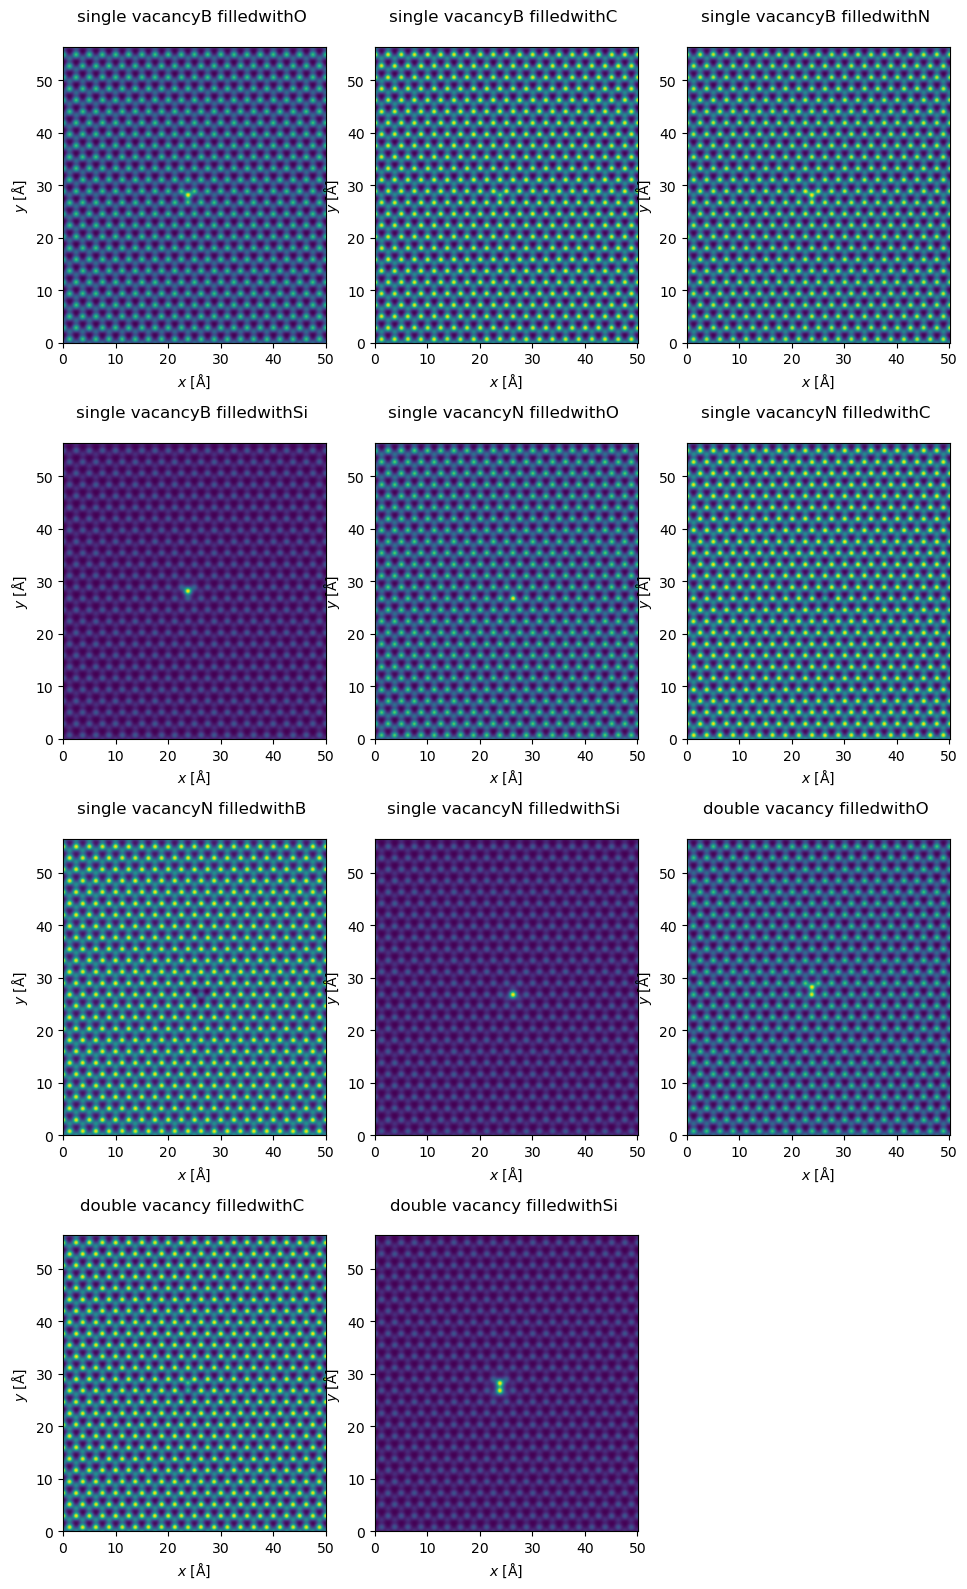

In [29]:
#plot
#CHOOSE:
columns = 3
zoom = 'no' #'yes' for zooming in

#FIX
rows = int(np.ceil(len(measurements_list)/columns))
fig, axs = plt.subplots(rows, columns, figsize=(10, rows*4))

i=0
for row in range(rows):
    for col in range(columns):
        try:
            #assign correct indices
            if rows ==1:
                ax_i = axs[col]
            else:
                ax_i = axs[row, col]

            #draw
            final_measurements[i].show(ax=ax_i, explode=False, cbar=False, title=True) 

            #assign correct parameter info
            if sorted_vals == True:
                ax_i.set_title(parameter_info_sorted[0][i])
            else:
                ax_i.set_title(parameter_info[i])
                

            if zoom == 'yes':
                ax_i.set_ylim(23,33)
                ax_i.set_xlim(20,30)

            i += 1
                
        except IndexError:
            #don't plot axes without content
            ax_i.set_visible(False)

fig.subplots_adjust(hspace=1.5)
plt.tight_layout()

fig.figure.savefig(f'{results_dir}/test.png', bbox_inches='tight')

### NOISE

In [17]:
#noise to account for finite electrone dose -> statistic deviation (see abtem walkthrough -> scan & detect)
noisy_measurements = final_measurements.poisson_noise(dose_per_area=dose, seed=100)


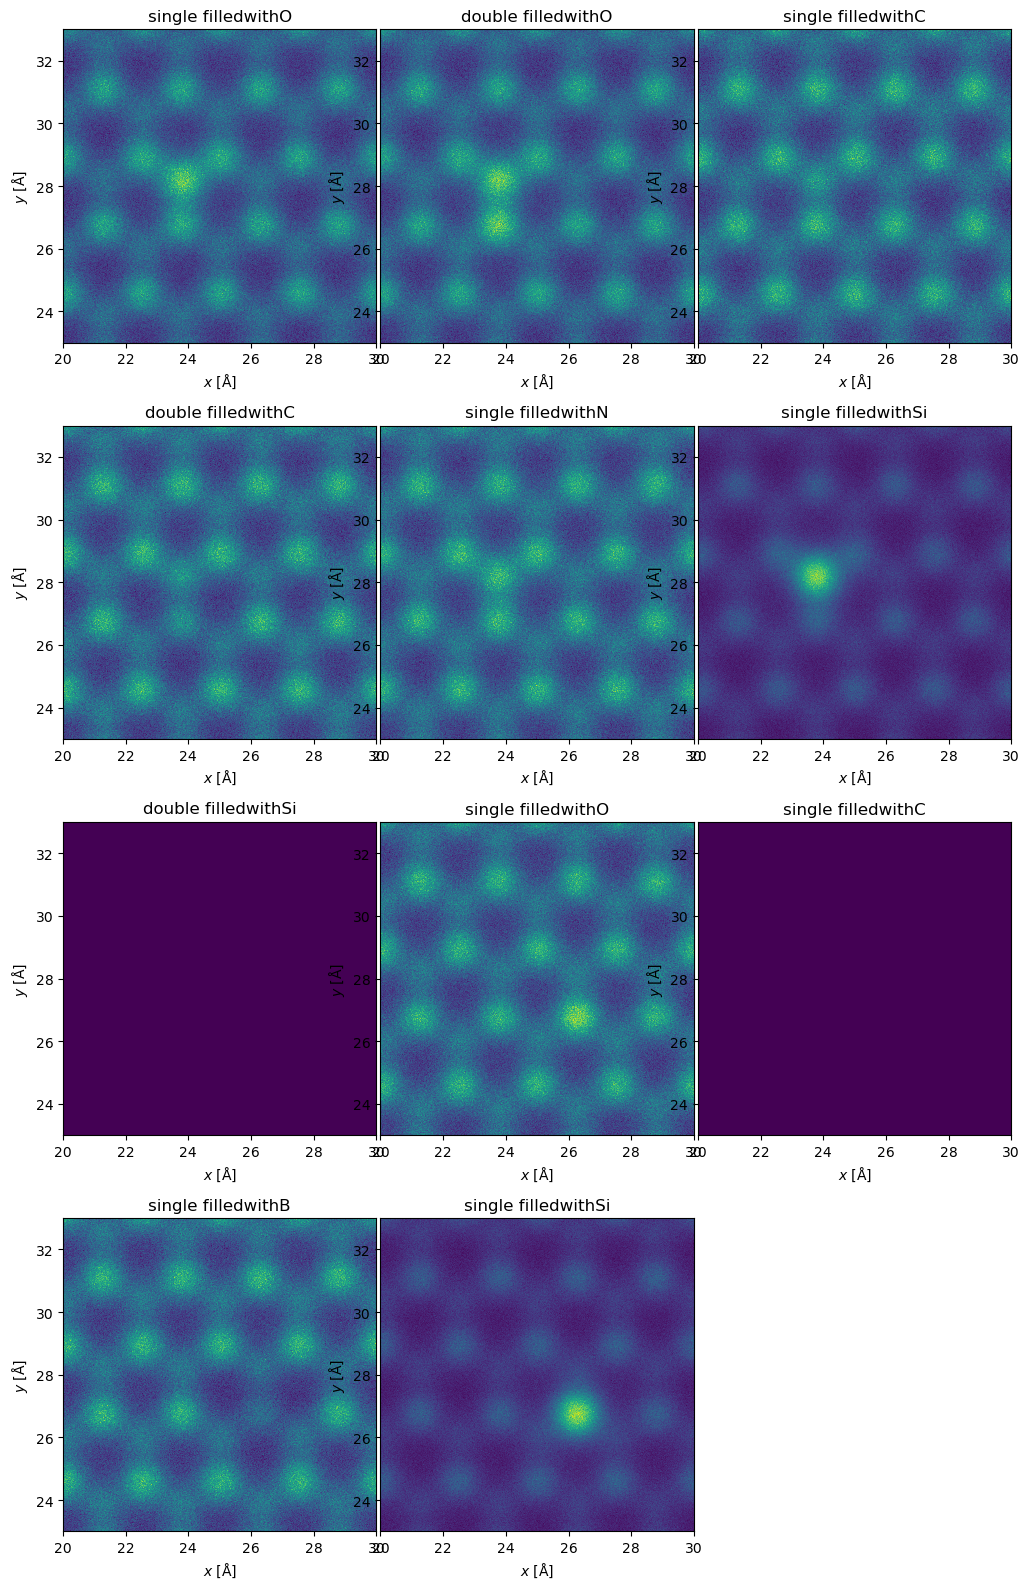

In [18]:
#plot
#CHOOSE:
columns = 3
zoom = 'yes' #'yes' for zooming in

#FIX
rows = int(np.ceil(len(measurements_list)/columns))
fig, axs = plt.subplots(rows, columns, figsize=(10, rows*4))

i=0
for row in range(rows):
    for col in range(columns):
        try:
            #assign correct indices
            if rows ==1:
                ax_i = axs[col]
            else:
                ax_i = axs[row, col]

            #draw
            noisy_measurements[i].show(ax=ax_i, explode=False, cbar=False, title=True) 
            
            #assign correct parameter info
            if sorted_vals == True:
                ax_i.set_title(parameter_info_sorted[0][i])
            else:
                ax_i.set_title(parameter_info[i])

            if zoom == 'yes':
                ax_i.set_ylim(23,33)
                ax_i.set_xlim(20,30)
            
            i += 1
                
        except IndexError:
            #don't plot axes without content
            ax_i.set_visible(False)

fig.subplots_adjust(hspace=1.5)
plt.tight_layout()

#fig.figure.savefig(f'{results_dir}/test_noise.png', bbox_inches='tight')

In [19]:
#alternative way of plotting (for small amount of images)
#noisy_measurements_plot = abtem.stack(noisy_measurements, parameter_info)
#noisy_measurements_plot[:].show(explode=True, figsize=(12, 4))